In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Read the dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
df = pd.read_csv("data/data_peliculas_transformado_filtrado.csv")
df.head()

,Título,URL,Procesado,Nota,Votos,Año,Reparto,Director,Compañías,Coproducción,Géneros,Premios,Presupuesto,Ingresos,Protagonistas
0,El verdugo,https://www.filmaffinity.com/es/film411856.html,Sí,8.2,41447.0,1963-01-01,"['José Isbert', 'Nino Manfredi', 'Emma Penella...",['Luis García Berlanga'],"['Naga Films', 'Zabra Films']",['España-Italia'],"['Comedia', 'Sátira', 'Comedia negra', 'Pelícu...",['1963: Festival de Venecia: Premios FIPRESCI'],0.0,0.0,José Isbert
1,Los santos inocentes,https://www.filmaffinity.com/es/film879812.html,Sí,8.1,44470.0,1984-01-01,"['Alfredo Landa', 'Francisco Rabal', 'Juan Die...",['Mario Camus'],"['Ganesh', 'RTVE']",[],"['Drama', 'Drama social', 'Vida rural', 'Años ...",['1984: Cannes: Mejor Actor (ex aequo: Francis...,0.0,3149062.0,Alfredo Landa
2,Plácido,https://www.filmaffinity.com/es/film895672.html,Sí,8.1,20396.0,1961-01-01,"['Cassen', 'José Luis López Vázquez', 'Elvira ...",['Luis García Berlanga'],"['Jet Films', 'Alfredo Matas']",[],"['Comedia', 'Pobreza', 'Navidad', 'Sátira']",['1961: Nominada al Oscar: Mejor película de h...,0.0,0.0,Cassen
3,Viridiana,https://www.filmaffinity.com/es/film123112.html,Sí,8.1,28771.0,1961-01-01,"['Silvia Pinal', 'Fernando Rey', 'Francisco Ra...",['Luis Buñuel'],"['Films 59', 'Uninci']",['España-México'],"['Drama', 'Religión', 'Película de culto']",['1961: Festival de Cannes: Palma de Oro (ex-a...,0.0,679244.0,Silvia Pinal
4,"Bienvenido, Míster Marshall",https://www.filmaffinity.com/es/film435869.html,Sí,8.0,31421.0,1953-01-01,"['José Isbert', 'Lolita Sevilla', 'Manolo Morá...",['Luis García Berlanga'],['Uninci'],[],"['Comedia', 'Sátira']",['1953: Festival de Cannes: Premio Internacion...,0.0,0.0,José Isbert


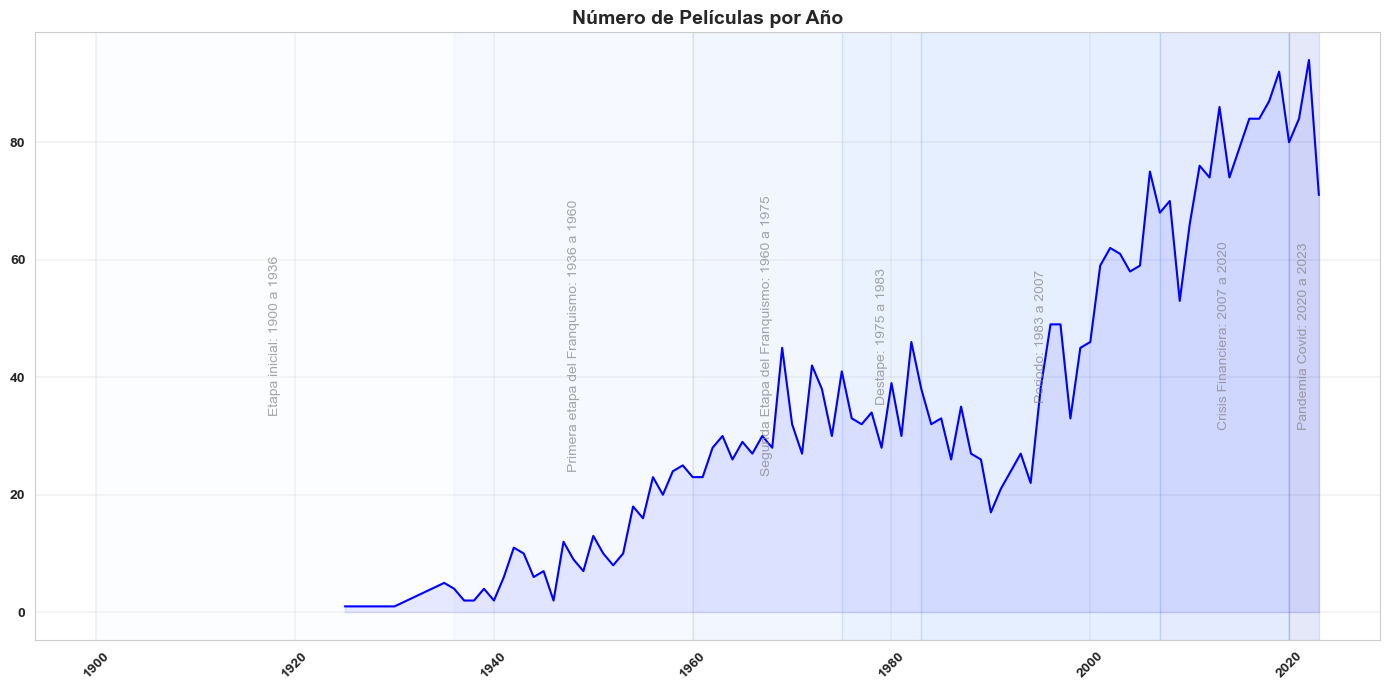

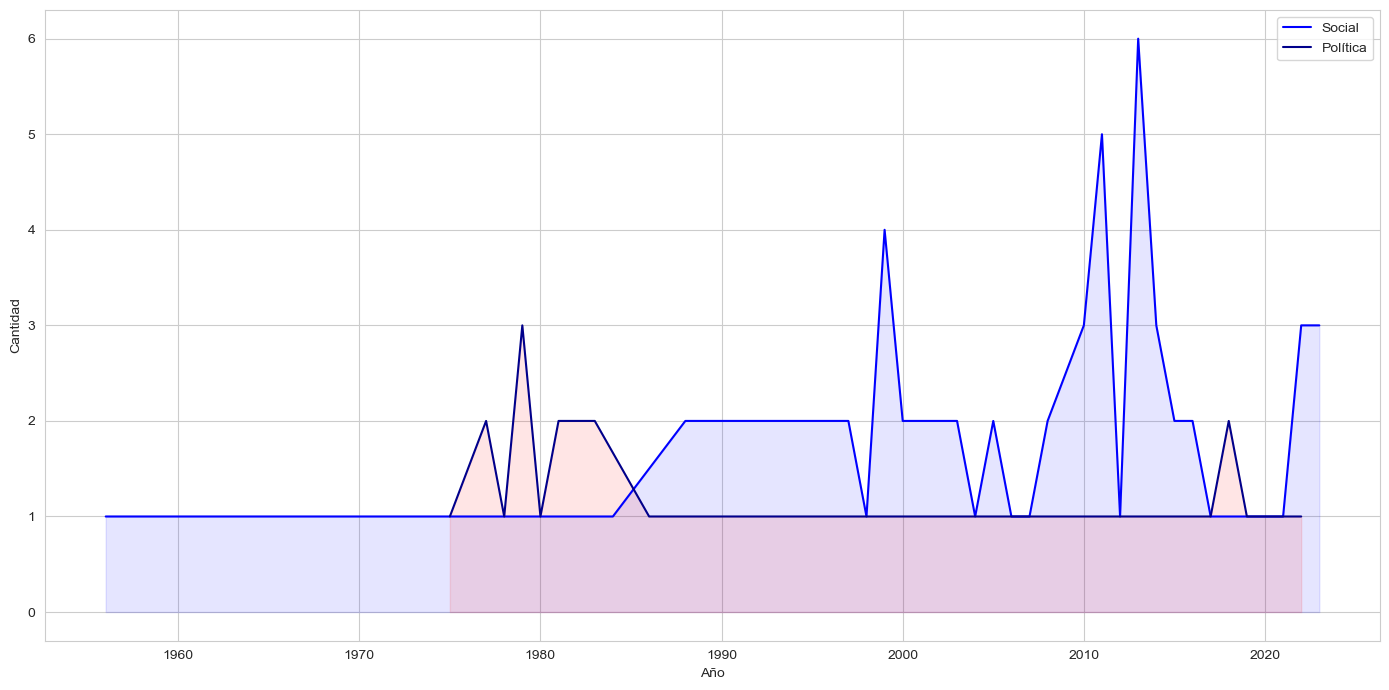

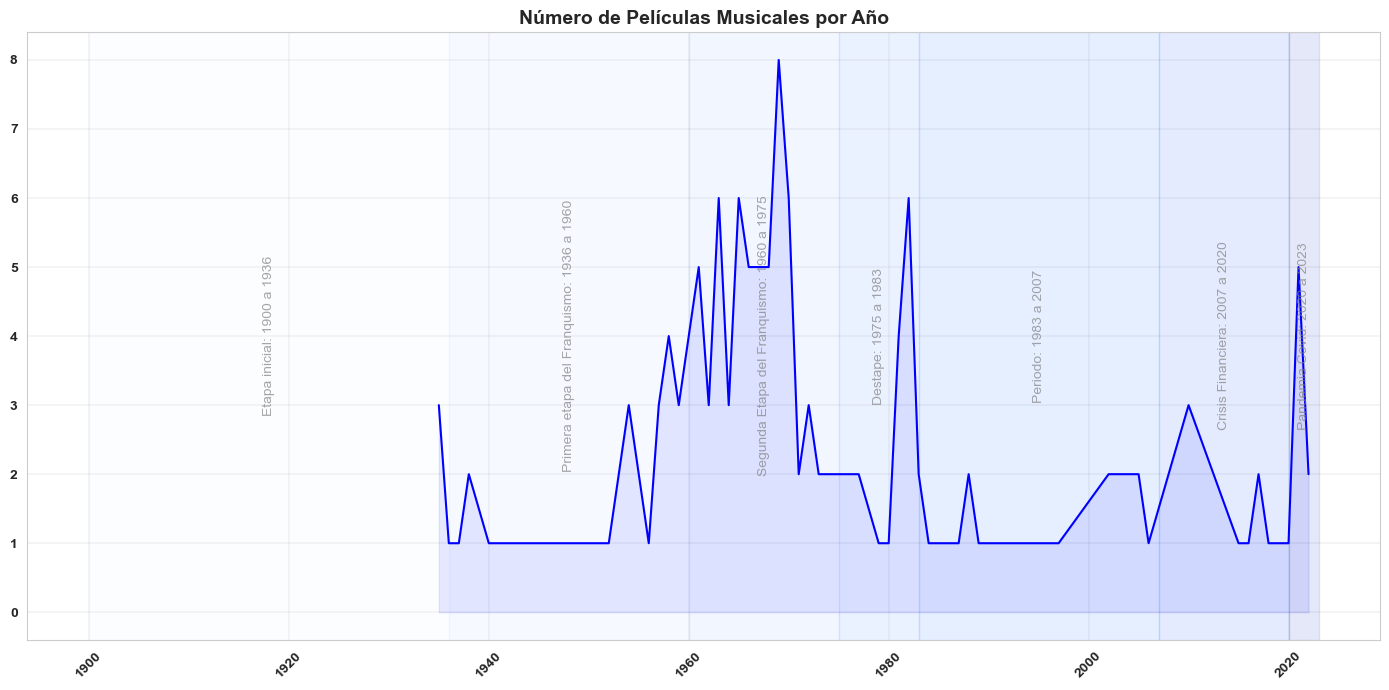

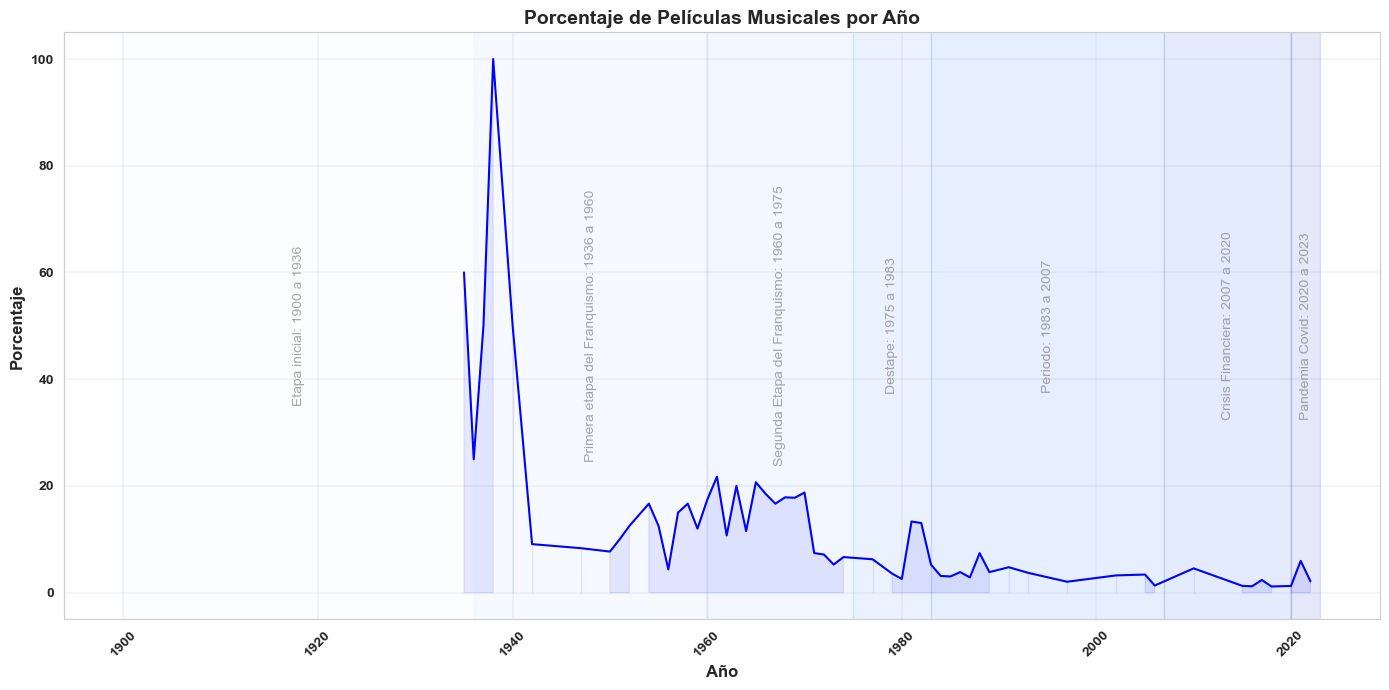

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("data/data_peliculas_transformado_filtrado.csv")

# Definir la función para aplicar el estilo estándar a las gráficas
def apply_standard_style(plot):
    sns.set_style("whitegrid")
    plot.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plot.set_axisbelow(True)
    plot.set_xlabel(plot.get_xlabel(), fontsize=12, weight='bold')
    plot.set_ylabel(plot.get_ylabel(), fontsize=12, weight='bold')
    plot.set_title(plot.get_title(), fontsize=14, weight='bold')
    for tick in plot.get_xticklabels():
        tick.set_rotation(45)
        tick.set_fontsize(10)
        tick.set_weight('bold')
    for tick in plot.get_yticklabels():
        tick.set_fontsize(10)
        tick.set_weight('bold')
    plt.tight_layout()

# Función para añadir sombreado de fondo y líneas divisorias con anotaciones verticales
def add_background_shading_and_dividers(plot):
    # Definir los períodos y sus etiquetas
    periods = [
        (1900, 1936, 'Etapa inicial: 1900 a 1936'),
        (1936, 1960, 'Primera etapa del Franquismo: 1936 a 1960'),
        (1960, 1975, 'Segunda Etapa del Franquismo: 1960 a 1975'),
        (1975, 1983, 'Destape: 1975 a 1983'),
        (1983, 2007, 'Periodo: 1983 a 2007'),
        (2007, 2020, 'Crisis Financiera: 2007 a 2020'),
        (2020, 2023, 'Pandemia Covid: 2020 a 2023')
    ]
    
    # Colores para el sombreado de fondo
    colors = ['#DDEEFF', '#AACCFF', '#77AAFF', '#4488FF', '#1166FF', '#0044FF', '#0022BB']
    
    # Aplicar el sombreado de fondo y las anotaciones
    for i, (start, end, label) in enumerate(periods):
        color = colors[i % len(colors)]
        plot.axvspan(start, end, color=color, alpha=0.1)
        mid_point = (start + end) / 2
        ylim = plot.get_ylim()
        vertical_position = ylim[0] + (ylim[1] - ylim[0]) / 2
        plot.text(mid_point, vertical_position, label, ha='center', va='center', rotation='vertical', color='grey', alpha=0.7)

# Convertir 'Año' a tipo datetime y extraer el año
df['Año'] = pd.to_datetime(df['Año'], errors='coerce')
df.dropna(subset=['Año'], inplace=True)  # Eliminar filas con fechas inválidas
df['Año'] = df['Año'].dt.year

# Gráfico 1: Número de Películas por Año
plt.figure(figsize=(14, 7))
data = df['Año'].value_counts().sort_index()
plot = sns.lineplot(x=data.index, y=data.values, color='blue')
plot.set_title('Número de Películas por Año')

# Rellenar debajo de la línea con color azul
plt.fill_between(data.index, data.values, color='blue', alpha=0.09)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)
plt.show()


# Gráfico 2: Número de Películas de Género Social y Política por Año
plt.figure(figsize=(14, 7))
peliculas_social = df[df['Géneros'].str.contains('Social', case=False, na=False)]
peliculas_politica = df[df['Géneros'].str.contains('Política', case=False, na=False)]
peliculas_social_por_año = peliculas_social['Año'].value_counts().sort_index()
peliculas_politica_por_año = peliculas_politica['Año'].value_counts().sort_index()
combined_data = pd.DataFrame({
    'Social': peliculas_social_por_año,
    'Política': peliculas_politica_por_año
}).stack().reset_index(name='Cantidad')
combined_data.columns = ['Año', 'Género', 'Cantidad']

# Dibujamos las líneas y el relleno para 'Social'
sns.lineplot(data=combined_data[combined_data['Género'] == 'Social'], x='Año', y='Cantidad', color='blue', label='Social')
plt.fill_between(combined_data[combined_data['Género'] == 'Social']['Año'], combined_data[combined_data['Género'] == 'Social']['Cantidad'], color='blue', alpha=0.1)

# Dibujamos las líneas y el relleno para 'Política'
sns.lineplot(data=combined_data[combined_data['Género'] == 'Política'], x='Año', y='Cantidad', color='darkblue', label='Política')
plt.fill_between(combined_data[combined_data['Género'] == 'Política']['Año'], combined_data[combined_data['Género'] == 'Política']['Cantidad'], color='red', alpha=0.1)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)

plt.show()


# Gráfico 3: Número de Películas Musicales por Año
plt.figure(figsize=(14, 7))
peliculas_musicales = df[df['Géneros'].str.contains('Musical', case=False, na=False)]
peliculas_musicales_por_año = peliculas_musicales['Año'].value_counts().sort_index()
plot = sns.lineplot(x=peliculas_musicales_por_año.index, y=peliculas_musicales_por_año.values, color='blue')
plot.set_title('Número de Películas Musicales por Año')
plt.fill_between(peliculas_musicales_por_año.index, peliculas_musicales_por_año.values, color='blue', alpha=0.09)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)
plt.show()
       
# Gráfico 4: Porcentaje de Películas Musicales por Año
plt.figure(figsize=(14, 7))
total_por_año = df['Año'].value_counts().sort_index()
porcentaje_musical_por_año = (peliculas_musicales_por_año / total_por_año) * 100
plot = sns.lineplot(x=porcentaje_musical_por_año.index, y=porcentaje_musical_por_año.values, color='blue')
plot.set_title('Porcentaje de Películas Musicales por Año')
plt.fill_between(porcentaje_musical_por_año.index, porcentaje_musical_por_año.values, color='blue', alpha=0.09)
plot.set_xlabel('Año')
plot.set_ylabel('Porcentaje')

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)
plt.show()